Imports

In [5]:
from statsmodels.tsa.arima.model import ARIMA
from tensorflow import keras
import numpy as np

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
import warnings
warnings.filterwarnings("ignore")

#### Data Loading

In [9]:
%store -r scaled_distances
%store -r biomass_history_scaled

In [10]:
biomass_history_unscaled = pd.read_csv(r"C:\Users\parul\OneDrive\Desktop\Projects\ShellAI\Shell_AI_Hackathon\dataset\Biomass_History.csv")

In [11]:
biomass_history_unscaled.head()

,Index,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
0,0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296
1,1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945
2,2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232
3,3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352
4,4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885


In [12]:
biomass_history_scaled = biomass_history_scaled.drop(["Index"], axis = 1)
biomass_history_unscaled = biomass_history_unscaled.drop(["Index"], axis = 1)

In [13]:
biomass_history_scaled.head()

,2010,2011,2012,2013,2014,2015,2016,2017,Latitude,Longitude
0,0.009591,0.011501,0.010555,0.004885,0.012375,0.008621,0.014369,0.005862,24.66818,71.33144
1,0.027192,0.037028,0.029670,0.017548,0.039481,0.035486,0.078638,0.047671,24.66818,71.41106
2,0.050732,0.085740,0.065361,0.042992,0.081346,0.055141,0.115106,0.082838,24.66818,71.49069
3,0.067868,0.104818,0.090567,0.051231,0.107265,0.091047,0.144971,0.114369,24.66818,71.57031
4,0.016582,0.025066,0.025152,0.014518,0.022406,0.024856,0.032152,0.029520,24.66818,71.64994


In [14]:
biomass_history_unscaled.head()

,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296
1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945
2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232
3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352
4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885


In [15]:
location = biomass_history_scaled[["Latitude", "Longitude"]]
time_series_data_scaled = biomass_history_scaled.iloc[:,:7]
y_time_series_data_scaled = biomass_history_scaled[["2017"]]

In [16]:
time_series_data_unscaled = biomass_history_unscaled.iloc[:,2:9]
y_time_series_data_unscaled = biomass_history_unscaled[["2017"]]

#### Data exploration

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


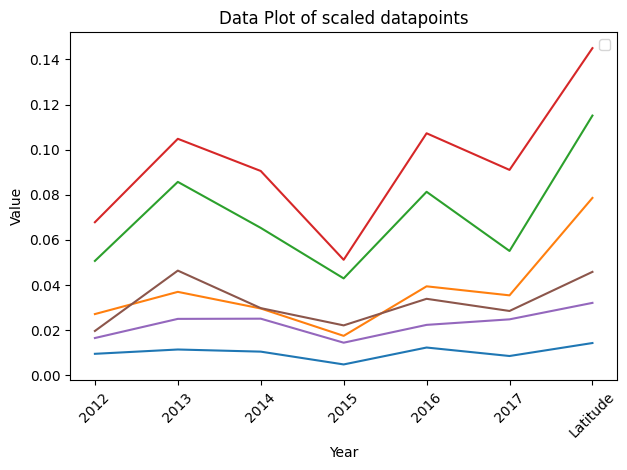

In [17]:
# Extract the years from the column names
years = biomass_history_scaled.columns[2:9]
i = 0
# Loop through each row and plot the values against years
for index, row in biomass_history_scaled.iterrows():
    plt.plot(years, row[:7])
    i += 1
    if i == 6:
        break

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Data Plot of scaled datapoints')
plt.legend()
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


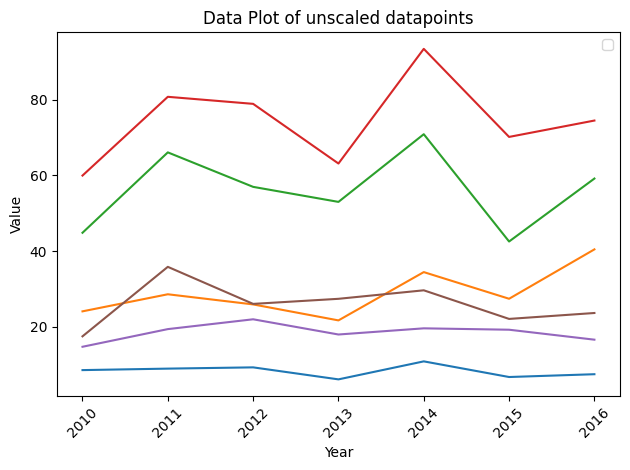

In [18]:
# Extract the years from the column names
years = biomass_history_unscaled.columns[2:9]
i = 0
# Loop through each row and plot the values against years
for index, row in biomass_history_unscaled.iterrows():
    plt.plot(years, row[2:9])
    i += 1
    if i == 6:
        break

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Data Plot of unscaled datapoints')
plt.legend()
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

#### Test for stationary points

In [19]:
test_scaled = time_series_data_scaled.iloc[:5,:]
test_unscaled = time_series_data_unscaled.iloc[:5,:]
y_scaled = y_time_series_data_scaled[:5]
y_unscaled = y_time_series_data_unscaled[:5]

In [20]:
from pmdarima import auto_arima

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
# function to return if the point is stationary or not

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = "AIC")
    #print(dftest)
    
    if dftest[1] < 0.05:
        return True
    else:
        return False

In [23]:
test_unscaled

,2010,2011,2012,2013,2014,2015,2016
0,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925
1,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847
2,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629
3,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720
4,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315


#### Transformations to transform non-stationary point

In [49]:
# function to count number of stationary points, given a dataframe
def number_of_non_stationary_points(dataframe):
    count_of_non_stationary_points = 0
    for row in dataframe.itertuples():

        data = np.cbrt(pd.DataFrame(row[1:])).diff().dropna()

        ad_test_result = ad_test(data)

        if ad_test_result == True:
            pass
        else:
            count_of_non_stationary_points += 1

    return count_of_non_stationary_points

number_of_non_stationary_points(time_series_data_scaled)

1152

In [56]:
# function to count number of stationary points using boxcox transformation, given a dataframe
from scipy import stats
def number_of_non_stationary_points_using_boxcox(dataframe):
    count_of_non_stationary_points = 0

    for row in dataframe.itertuples():
        fitted_data, fitted_lambda = stats.boxcox(np.array(row[1:]))
        ad_test_result = ad_test(fitted_data)
        if ad_test_result == True:
            pass
        else:
            count_of_non_stationary_points += 1

    return count_of_non_stationary_points

number_of_non_stationary_points_using_boxcox(test_unscaled)

2

### Transforming data using trnsformation

In [57]:
def transform_data(data):

    transformed_data = np.cbrt(data).diff().dropna()

    return transformed_data

In [59]:
data = transform_data(time_series_data_scaled.T).T

In [60]:
y_transformed = np.cbrt(y_time_series_data_scaled)

### Train test split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(data, y_transformed, test_size = 0.2, random_state = 0)

In [62]:
X_test

,2011,2012,2013,2014,2015,2016
2328,-0.023823,0.028855,0.006314,-0.033435,0.021762,0.040258
1742,0.065013,-0.294620,0.147077,0.060833,-0.280802,-0.076883
810,0.010961,-0.091992,-0.014949,0.039233,0.095553,0.027855
2014,0.067499,-0.071752,0.080500,0.174028,-0.161322,0.070363
618,0.006399,0.009885,-0.067198,0.124244,-0.006414,0.118924
...,...,...,...,...,...,...
1814,0.016258,-0.122925,0.026501,0.018495,0.025379,0.058201
1388,0.094816,-0.373498,0.309406,0.031742,-0.021636,-0.149306
2270,0.006453,-0.013282,0.019877,-0.005739,0.013206,0.015062
794,0.007970,0.002901,-0.093032,0.093033,-0.002901,-0.007225


## Forecasting

#### Implementing Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [64]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.4324759904719707

In [66]:
X_train

,2011,2012,2013,2014,2015,2016
386,0.083196,-0.080190,-0.083599,0.096901,0.007631,0.066005
1735,-0.016128,-0.013183,0.038047,0.015250,-0.074652,0.124982
459,0.001668,0.082150,-0.072046,-0.023986,0.012193,0.154242
1129,0.008914,-0.021910,-0.026555,0.083802,0.004989,0.067161
1914,-0.025069,-0.272212,0.350737,-0.150666,0.125696,-0.057959
...,...,...,...,...,...,...
1033,0.072965,-0.179332,0.099373,0.051414,-0.017007,-0.051155
1731,0.088363,-0.099874,0.011034,0.116293,-0.093111,0.025706
763,0.033295,-0.038335,-0.047298,0.047299,0.038335,0.111968
835,-0.006100,0.003667,-0.031999,0.005730,0.044827,0.044713


In [67]:
y_train

,2017
386,0.560791
1735,0.187360
459,0.156794
1129,0.465988
1914,0.783193
...,...
1033,0.367292
1731,0.259489
763,0.438618
835,0.233280


## Implementing LSTM

In [68]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [69]:
import numpy as np

In [70]:
# setting the seed to achieve consistent and less random predictions at each execution
np.random.seed(0)

# setting the model architecture
model=Sequential()
model.add(LSTM(100,return_sequences = True, activation='tanh',input_shape=(len(X_train.columns),1)))
model.add(Dropout(0.1))
model.add(LSTM(100,return_sequences = True, activation='tanh'))
model.add(Dropout(0.1))

model.add(LSTM(100, activation = 'tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))

# printing the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 6, 100)            40800     
                                                                 
 dropout_3 (Dropout)         (None, 6, 100)            0         
                                                                 
 lstm_4 (LSTM)               (None, 6, 100)            80400     
                                                                 
 dropout_4 (Dropout)         (None, 6, 100)            0         
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [71]:
# compiling the model
model.compile(loss='mse' , optimizer='adam')

# fitting the model using the training dataset
model.fit(X_train, y_train, validation_split=0.35, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
158/158 [==============================] - 14s 31ms/step - loss: 0.0604 - val_loss: 0.0606
Epoch 2/50
158/158 [==============================] - 3s 17ms/step - loss: 0.0479 - val_loss: 0.0455
Epoch 3/50
158/158 [==============================] - 3s 17ms/step - loss: 0.0406 - val_loss: 0.0323
Epoch 4/50
158/158 [==============================] - 2s 15ms/step - loss: 0.0335 - val_loss: 0.0268
Epoch 5/50
158/158 [==============================] - 2s 16ms/step - loss: 0.0283 - val_loss: 0.0229
Epoch 6/50
158/158 [==============================] - 3s 21ms/step - loss: 0.0234 - val_loss: 0.0321
Epoch 7/50
158/158 [==============================] - 3s 22ms/step - loss: 0.0216 - val_loss: 0.0169
Epoch 8/50
158/158 [==============================] - 4s 23ms/step - loss: 0.0189 - val_loss: 0.0177
Epoch 9/50
158/158 [==============================] - 3s 20ms/step - loss: 0.0173 - val_loss: 0.0134
Epoch 10/50
158/158 [==============================] - 3s 19ms/step - loss: 0.0166 - val_l

#### Predictions

In [72]:
# Predictions
predictions = model.predict(X_train) 

61/61 [==============================] - 3s 7ms/step


In [73]:
predictions

array([[0.58380204],
       [0.2801319 ],
       [0.42219657],
       ...,
       [0.5301091 ],
       [0.3351711 ],
       [0.79551464]], dtype=float32)

In [74]:
# calculating the training mean-squared-error
train_loss = model.evaluate(X_train, y_train, batch_size = 1)

# calculating the test mean-squared-error
test_loss = model.evaluate(X_test, y_test, batch_size = 1)

# printing the training and the test mean-squared-errors
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

484/484 [==============================] - 2s 4ms/step - loss: 0.0102
Train Loss = 0.0098
Test Loss = 0.0102


In [101]:
# training the model on the whole dataset
model.fit(data, y_transformed, validation_split=0.35, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
197/197 [==============================] - 7s 33ms/step - loss: 0.0113 - val_loss: 0.0096
Epoch 2/50
197/197 [==============================] - 6s 33ms/step - loss: 0.0108 - val_loss: 0.0090
Epoch 3/50
197/197 [==============================] - 6s 30ms/step - loss: 0.0108 - val_loss: 0.0093
Epoch 4/50
197/197 [==============================] - 6s 30ms/step - loss: 0.0101 - val_loss: 0.0097
Epoch 5/50
197/197 [==============================] - 6s 28ms/step - loss: 0.0106 - val_loss: 0.0090
Epoch 6/50
197/197 [==============================] - 6s 28ms/step - loss: 0.0104 - val_loss: 0.0089
Epoch 7/50
197/197 [==============================] - 5s 28ms/step - loss: 0.0101 - val_loss: 0.0101
Epoch 8/50
197/197 [==============================] - 6s 31ms/step - loss: 0.0099 - val_loss: 0.0112
Epoch 9/50
197/197 [==============================] - 6s 28ms/step - loss: 0.0097 - val_loss: 0.0101
Epoch 10/50
197/197 [==============================] - 6s 29ms/step - loss: 0.0094 - val_lo

## Final Data Prepration 

In [102]:
pred_2018 = model.predict(data) 

76/76 [==============================] - 1s 16ms/step


In [103]:
pred_2018 =  pd.DataFrame(pred_2018, columns = ['2018'])

In [104]:
data_with_2018 = pd.concat([data, y_transformed, pred_2018], axis=1)

In [106]:
pred_2019 = model.predict(data_with_2018) 
pred_2019 =  pd.DataFrame(pred_2019, columns = ['2019'])

76/76 [==============================] - 6s 20ms/step


In [107]:
biomass_availability_forecasted_data = pd.concat([location, data_with_2018, pred_2019], axis=1)

In [108]:
biomass_availability_forecasted_data

,Latitude,Longitude,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,24.66818,71.33144,0.013260,-0.006368,-0.049681,0.061624,-0.026255,0.038067,0.180307,0.329560,0.564174
1,24.66818,71.41106,0.032596,-0.023727,-0.049718,0.080648,-0.011895,0.099814,0.362593,0.458147,0.595209
2,24.66818,71.49069,0.070763,-0.038139,-0.052497,0.082972,-0.052671,0.105824,0.435923,0.429770,0.604104
3,24.66818,71.57031,0.063595,-0.022417,-0.077678,0.103736,-0.025266,0.075451,0.485404,0.483604,0.600153
4,24.66818,71.64994,0.037655,0.000337,-0.049042,0.037966,0.009922,0.026143,0.309058,0.294257,0.600164
...,...,...,...,...,...,...,...,...,...,...,...
2413,20.15456,72.84432,-0.000274,-0.009764,-0.041304,0.051155,0.009807,0.041831,0.181932,0.380021,0.561181
2414,20.15456,72.92394,0.003012,-0.005930,-0.003965,0.007043,0.002285,0.011529,0.051462,0.121790,0.421344
2415,20.15456,73.00357,0.002009,-0.004043,-0.002755,0.004901,0.001583,0.007887,0.035245,0.108112,0.365419
2416,20.15456,73.08319,-0.024337,-0.023196,0.001331,0.015475,0.005030,0.025518,0.113851,0.254491,0.538658
